In [1]:
# !pip install opencv-python
# !pip install imutils

In [2]:
from imutils import face_utils 
import numpy as np
import argparse 
import imutils
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Read Data

In [3]:
names = ['good', 'poor', 'very_poor']

def getLabel(id):
    return  ['good', 'poor', 'very_poor'][id]

def getLabelName(name):
    if name == 'new_good': return 0
    elif name == 'new_poor': return 1
    elif name == 'new_very_poor': return 2

print(getLabel(2))
print(getLabelName('good'))

very_poor
None


In [4]:
print(getLabelName('new_good'))

0


In [5]:
import random

def get_data_from_folder():
    data_dir_list = ['new_poor', 'new_good', 'new_very_poor']
    img_data_list= []
    labels = []
    

    for dataset in data_dir_list:
        img_list = os.listdir(dataset)
        init_label = getLabelName(dataset)
        
        print(dataset)
        print('Loaded the images of dataset-'+'{}'.format(dataset), end=" --> ")
        print(len(img_list))
        
        temp = []
        label_temp = []
        for img in img_list:
            temp.append(dataset + '/'+ img)
            label_temp.append(init_label)
        
        random.shuffle(temp)
        img_data_list = img_data_list +  temp[:1700]
        labels = labels + label_temp[:1700]
        print("last data:", len(img_data_list))
        print("last label:", len(labels),"\n")

    num_classes = 3
    Y = np_utils.to_categorical(labels, num_classes)
    return img_data_list, Y

In [6]:
os.chdir("D:\ML_Final-Project\Dataset\Dataset\RoadDamageDataset")
print(os.getcwd())
img_data_list, y_data = get_data_from_folder()

D:\ML_Final-Project\Dataset\Dataset\RoadDamageDataset
new_poor
Loaded the images of dataset-new_poor --> 8272
last data: 1700
last label: 1700 

new_good
Loaded the images of dataset-new_good --> 4287
last data: 3400
last label: 3400 

new_very_poor
Loaded the images of dataset-new_very_poor --> 1711
last data: 5100
last label: 5100 



In [7]:
# os.chdir("D:/ML_Final-Project")
# os.getcwd()

# Get Array

In [8]:
def praproses(img):
  #ubah ukuran
#   dim = (100, 100)
#   img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

  #grayscale
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

In [9]:
def get_array_img(img_data_list):
  hasil_feature = []
  for i in img_data_list:
    hasil = cv2.imread(i)
    print(i)
    hasil_praproses=hasil
    hasil_feature.append(hasil_praproses)

  img_data = np.array(hasil_feature)
  img_data = img_data.astype('float32')
  img_data = img_data/255
  img_data.shape
  return img_data

In [10]:
# get array image train
data_array = get_array_img(img_data_list)

new_poor/Adachi_20170912152625.jpg
new_poor/Muroran_20170906094700.jpg
new_poor/Numazu_20170906144213.jpg
new_poor/Adachi_20170914110003.jpg
new_poor/Numazu_20170906090309.jpg
new_poor/Adachi_20170907134552.jpg
new_poor/kaga_20190801091106.jpg
new_poor/Ichihara_20170929091552.jpg
new_poor/Numazu_20170906103800.jpg
new_poor/Ichihara_20170929093920.jpg
new_poor/hitachiota03_20190624114404.jpg
new_poor/Adachi_20170906151533.jpg
new_poor/Sumida_20170920153355.jpg
new_poor/kaga01_20190704130643.jpg
new_poor/Chiba_20170925154406.jpg
new_poor/morotuka00_20190419143552.jpg
new_poor/Muroran_20170915134659.jpg
new_poor/Muroran_20170925130652.jpg
new_poor/kaga01_20190704135133.jpg
new_poor/Nagakute_20170908101157.jpg
new_poor/Nagakute_20170911094251.jpg
new_poor/Numazu_20170907141921.jpg
new_poor/Nagakute_20170912093809.jpg
new_poor/hitachiota07_20190903133825.jpg
new_poor/Muroran_20170921094731.jpg
new_poor/hitachiota03_20190626160546.jpg
new_poor/Adachi_20170908100206.jpg
new_poor/Numazu_201709

new_poor/Nagakute_20170913153647.jpg
new_poor/kaga_20190722093621.jpg
new_poor/Muroran_20170906112206.jpg
new_poor/Muroran_20170921093027.jpg
new_poor/Numazu_20170906150104.jpg
new_poor/img_20180417175012341_2.jpg
new_poor/Muroran_20170908095505.jpg
new_poor/Muroran_20170907111247.jpg
new_poor/Muroran_20170913134851.jpg
new_poor/Nagakute_20170907150332.jpg
new_poor/Numazu_20170907142540.jpg
new_poor/Nagakute_20170908103537.jpg
new_poor/Nagakute_20170912153306.jpg
new_poor/Ichihara_20170929095925.jpg
new_poor/Nagakute_20170908102446.jpg
new_poor/Muroran_20170920110238.jpg
new_poor/Adachi_20170914113026.jpg
new_poor/Adachi_20170920150551.jpg
new_poor/Numazu_20170907134210.jpg
new_poor/hitachiota03_20190624110511.jpg
new_poor/Muroran_20170906113142.jpg
new_poor/Muroran_20170908145702.jpg
new_poor/Muroran_20170912142705.jpg
new_poor/hitachiota03_20190624110636.jpg
new_poor/Muroran_20170911150949.jpg
new_poor/Numazu_20170907135249.jpg
new_poor/Ichihara_20170929101310.jpg
new_poor/Muroran_20

new_poor/Numazu_20170906103001.jpg
new_poor/Numazu_20170906100901.jpg
new_poor/hitachiota03_20190627095831.jpg
new_poor/Numazu_20170907143417.jpg
new_poor/Muroran_20170906112343.jpg
new_poor/chiba02_20190903141637.jpg
new_poor/Muroran_20170911085838.jpg
new_poor/Nagakute_20170907145020.jpg
new_poor/hitachiota03_20190626142147.jpg
new_poor/hitachiota03_20190627095328.jpg
new_poor/Muroran_20170920120928.jpg
new_poor/Nagakute_20170912093728.jpg
new_poor/Numazu_20170906133807.jpg
new_poor/Ichihara_20170929101543.jpg
new_poor/Adachi_20170908135042.jpg
new_poor/shinagawa01_20190424151801.jpg
new_poor/hitachiota07_20190619092818.jpg
new_poor/Muroran_20170911110042.jpg
new_poor/Adachi_20170906094244.jpg
new_poor/img_20180417200930650_2.jpg
new_poor/Numazu_20170906143145.jpg
new_poor/Numazu_20170906151225.jpg
new_poor/Adachi_20170906151548.jpg
new_poor/Numazu_20170906145439.jpg
new_poor/Numazu_20170905144229.jpg
new_poor/hitachiota03_20190626160058.jpg
new_poor/Muroran_20170906140808.jpg
new_po

new_poor/Nagakute_20170907144443.jpg
new_poor/Muroran_20170911092851.jpg
new_poor/hitachiota03_20190624161054.jpg
new_poor/hitachiota03_20190624150851.jpg
new_poor/Muroran_20170915142953.jpg
new_poor/hitachiota06_20190617134512.jpg
new_poor/Muroran_20170911144230.jpg
new_poor/Nagakute_20170907154036.jpg
new_poor/Numazu_20170906140800.jpg
new_poor/Nagakute_20170907152912.jpg
new_poor/hitachiota03_20190626154910.jpg
new_poor/Sumida_20170907170432.jpg
new_poor/Nagakute_20170912131452.jpg
new_poor/Adachi_20170914152701.jpg
new_poor/hitachiota07_20190711160301.jpg
new_poor/hitachiota03_20190624114143.jpg
new_poor/otsu00_20190809145254.jpg
new_poor/hitachiota03_20190624163500.jpg
new_poor/kaga_20190712105657.jpg
new_poor/Muroran_20170913130854.jpg
new_poor/Numazu_20170906140746.jpg
new_poor/shinagawa01_20190409105926.jpg
new_poor/Muroran_20170921103524.jpg
new_poor/Numazu_20170907134853.jpg
new_poor/Ichihara_20170929095543.jpg
new_poor/otsu00_20190621092420.jpg
new_poor/Numazu_20170906153844

new_poor/Numazu_20170906142301.jpg
new_poor/Nagakute_20170908090322.jpg
new_poor/kaga_20190807135041.jpg
new_poor/Muroran_20170907112340.jpg
new_poor/otsu01_20190802140151.jpg
new_poor/Adachi_20170912151118.jpg
new_poor/Muroran_20170907141027.jpg
new_poor/otsu00_20190628092820.jpg
new_poor/Numazu_20170906093111.jpg
new_poor/Muroran_20170907090603.jpg
new_poor/Nagakute_20170912135249.jpg
new_poor/Muroran_20170920132249.jpg
new_poor/Numazu_20170906154559.jpg
new_poor/otsu01_20190704110419.jpg
new_poor/Numazu_20170906103003.jpg
new_poor/Adachi_20170908104016.jpg
new_poor/Nagakute_20170907142600.jpg
new_poor/Muroran_20170907145716.jpg
new_poor/hitachiota07_20190801103158.jpg
new_poor/Nagakute_20170908103644.jpg
new_poor/Adachi_20170912141936.jpg
new_poor/Muroran_20170908093250.jpg
new_poor/Numazu_20170906141757.jpg
new_poor/Nagakute_20170908090358.jpg
new_poor/Muroran_20170911115255.jpg
new_poor/Muroran_20170907111511.jpg
new_poor/Sumida_20170915090733.jpg
new_poor/Sumida_20170913155832.jp

new_poor/Muroran_20170915141421.jpg
new_poor/Nagakute_20170908090350.jpg
new_poor/Numazu_20170906144134.jpg
new_poor/Adachi_20170908103306.jpg
new_poor/Adachi_20170920141112.jpg
new_poor/Muroran_20170920110718.jpg
new_poor/Nagakute_20170912145437.jpg
new_poor/Numazu_20170906103006.jpg
new_poor/Numazu_20170907132354.jpg
new_poor/Adachi_20170908101550.jpg
new_poor/hitachiota07_20190711160514.jpg
new_poor/hitachiota03_20190624113902.jpg
new_poor/Adachi_20170907134033.jpg
new_poor/img_20181110113203119_1.jpg
new_poor/Numazu_20170906094819.jpg
new_poor/Muroran_20170920120042.jpg
new_poor/Nagakute_20170907152858.jpg
new_poor/Muroran_20170911092734.jpg
new_poor/otsu00_20190621092520.jpg
new_poor/Muroran_20170911091204.jpg
new_poor/hitachiota03_20190624154028.jpg
new_poor/Sumida_20170908152516.jpg
new_poor/hitachiota03_20190626154808.jpg
new_poor/hitachiota03_20190627095336.jpg
new_poor/Numazu_20170906095039.jpg
new_poor/Muroran_20170911141131.jpg
new_poor/Muroran_20170911100628.jpg
new_poor/N

new_poor/Numazu_20170907131957.jpg
new_poor/Muroran_20170914094532.jpg
new_poor/Adachi_20170906102558.jpg
new_poor/Numazu_20170906153628.jpg
new_poor/Chiba_20170915135643.jpg
new_poor/Ichihara_20170929093642.jpg
new_poor/kyusyu_20190124155106295.jpg
new_poor/Numazu_20170906092717.jpg
new_poor/Numazu_20170907142029.jpg
new_poor/hitachiota07_20190626160936.jpg
new_poor/Nagakute_20170908103532.jpg
new_poor/Nagakute_20170908090205.jpg
new_poor/Adachi_20170908093858.jpg
new_poor/otsu01_20190704110420.jpg
new_poor/hitachiota06_20190619150815.jpg
new_poor/hitachiota03_20190624160450.jpg
new_poor/otsu00_20190611092642.jpg
new_poor/Numazu_20170906142037.jpg
new_poor/Numazu_20170907145358.jpg
new_poor/chiba02_20190903135253.jpg
new_poor/hitachiota03_20190627102321.jpg
new_poor/otsu01_20190704105555.jpg
new_poor/Muroran_20170906102420.jpg
new_poor/Sumida_20170908155603.jpg
new_poor/Numazu_20170906095407.jpg
new_poor/Nagakute_20170908101405.jpg
new_poor/Nagakute_20170908101402.jpg
new_poor/Muroran

new_poor/Muroran_20170907114506.jpg
new_poor/Muroran_20170907133718.jpg
new_poor/Nagakute_20170912141533.jpg
new_poor/Muroran_20170906115020.jpg
new_poor/kaga_20190712111819.jpg
new_poor/hitachiota03_20190624161505.jpg
new_poor/Ichihara_20170929092757.jpg
new_poor/Adachi_20170906150546.jpg
new_poor/Muroran_20170920093604.jpg
new_poor/kaga01_20190704110006.jpg
new_poor/Chiba_20170925145211.jpg
new_poor/Numazu_20170906090050.jpg
new_poor/Numazu_20170907141712.jpg
new_poor/kaga_20190808164435.jpg
new_poor/Muroran_20170908140212.jpg
new_poor/Nagakute_20170912131509.jpg
new_poor/kaga_20190828152708.jpg
new_poor/Muroran_20170907102253.jpg
new_poor/Nagakute_20170907144526.jpg
new_poor/Adachi_20170921111158.jpg
new_poor/otsu00_20190829103509.jpg
new_poor/hitachiota07_20190801100904.jpg
new_poor/Nagakute_20170908101412.jpg
new_poor/hitachiota03_20190624105229.jpg
new_poor/Numazu_20170906092237.jpg
new_poor/Chiba_20170915134842.jpg
new_poor/otsu00_20190716135358.jpg
new_good/Nagakute_20170908102

new_good/Ichihara_20170929094244.jpg
new_good/Nagakute_20170912132616.jpg
new_good/Numazu_20170906103349.jpg
new_good/Adachi_20170911102330.jpg
new_good/Adachi_20170914104503.jpg
new_good/Adachi_20170911105614.jpg
new_good/Nagakute_20170907143200.jpg
new_good/Nagakute_20170907150431.jpg
new_good/Numazu_20170906094604.jpg
new_good/Adachi_20170913110355.jpg
new_good/Adachi_20170906153746.jpg
new_good/Muroran_20170913111017.jpg
new_good/Numazu_20170905143913.jpg
new_good/Adachi_20170906144435.jpg
new_good/Sumida_20170913160308.jpg
new_good/Numazu_20170906084647.jpg
new_good/Muroran_20170906133007.jpg
new_good/Numazu_20170906100615.jpg
new_good/Ichihara_20170929094206.jpg
new_good/Nagakute_20170908101417.jpg
new_good/Muroran_20170921131047.jpg
new_good/Sumida_20170914171138.jpg
new_good/Muroran_20170908150407.jpg
new_good/Adachi_20170921134441.jpg
new_good/Muroran_20170911094408.jpg
new_good/Adachi_20170921105036.jpg
new_good/Nagakute_20170911105545.jpg
new_good/Sumida_20170907170217.jpg
n

new_good/Muroran_20170908100641.jpg
new_good/Sumida_20170908164307.jpg
new_good/Sumida_20170921093221.jpg
new_good/Sumida_20170913154334.jpg
new_good/Numazu_20170906103033.jpg
new_good/Numazu_20170906095646.jpg
new_good/Numazu_20170907143147.jpg
new_good/Nagakute_20170908111654.jpg
new_good/Sumida_20170907152622.jpg
new_good/Numazu_20170906144522.jpg
new_good/Numazu_20170906103711.jpg
new_good/Nagakute_20170907151537.jpg
new_good/Adachi_20170907135021.jpg
new_good/Adachi_20170906144624.jpg
new_good/Nagakute_20170911091102.jpg
new_good/Nagakute_20170907155218.jpg
new_good/Nagakute_20170912132900.jpg
new_good/Muroran_20170906102542.jpg
new_good/Sumida_20170915151055.jpg
new_good/Nagakute_20170908111605.jpg
new_good/Adachi_20170914150741.jpg
new_good/Sumida_20170915093346.jpg
new_good/Adachi_20170908100033.jpg
new_good/Sumida_20170920165526.jpg
new_good/Adachi_20170906094110.jpg
new_good/Numazu_20170907144152.jpg
new_good/Numazu_20170907132020.jpg
new_good/Muroran_20170921092454.jpg
new_g

new_good/Adachi_20170908101427.jpg
new_good/Numazu_20170906135619.jpg
new_good/Numazu_20170907143033.jpg
new_good/Nagakute_20170908090458.jpg
new_good/Numazu_20170907132320.jpg
new_good/Nagakute_20170912135506.jpg
new_good/Chiba_20170913102740.jpg
new_good/Numazu_20170906105258.jpg
new_good/Numazu_20170906141400.jpg
new_good/Muroran_20170908100759.jpg
new_good/Numazu_20170906141745.jpg
new_good/Adachi_20170914154726.jpg
new_good/Sumida_20170912145326.jpg
new_good/Adachi_20170908104639.jpg
new_good/Chiba_20170925171808.jpg
new_good/Nagakute_20170913150138.jpg
new_good/Adachi_20170920150559.jpg
new_good/Sumida_20170920151702.jpg
new_good/Muroran_20170907145816.jpg
new_good/Adachi_20170906094048.jpg
new_good/Muroran_20170906102541.jpg
new_good/Adachi_20170920144855.jpg
new_good/Adachi_20170906093900.jpg
new_good/Sumida_20170920145035.jpg
new_good/Adachi_20170914151837.jpg
new_good/Chiba_20170925171831.jpg
new_good/Adachi_20170911101442.jpg
new_good/Numazu_20170907131952.jpg
new_good/Numaz

new_good/Sumida_20170920165638.jpg
new_good/Adachi_20170921155217.jpg
new_good/Adachi_20170908103411.jpg
new_good/Numazu_20170907140542.jpg
new_good/Numazu_20170907132340.jpg
new_good/Adachi_20170908145949.jpg
new_good/Adachi_20170914154939.jpg
new_good/Adachi_20170911102640.jpg
new_good/Muroran_20170921092400.jpg
new_good/Nagakute_20170907131828.jpg
new_good/Numazu_20170906151901.jpg
new_good/Sumida_20170907132929.jpg
new_good/Adachi_20170914113026.jpg
new_good/Sumida_20170911152922.jpg
new_good/Sumida_20170920163524.jpg
new_good/Adachi_20170914155000.jpg
new_good/Muroran_20170915141421.jpg
new_good/Adachi_20170907134447.jpg
new_good/Adachi_20170906152406.jpg
new_good/Sumida_20170920145353.jpg
new_good/Sumida_20170915161854.jpg
new_good/Muroran_20170914093640.jpg
new_good/Sumida_20170915160104.jpg
new_good/Chiba_20170925144334.jpg
new_good/Sumida_20170913154056.jpg
new_good/Adachi_20170914152708.jpg
new_good/Chiba_20170913095152.jpg
new_good/Nagakute_20170908090351.jpg
new_good/Adachi

new_good/Adachi_20170908100730.jpg
new_good/Chiba_20170925171900.jpg
new_good/Adachi_20170907135932.jpg
new_good/Sumida_20170920143035.jpg
new_good/Nagakute_20170912140422.jpg
new_good/Adachi_20170914155205.jpg
new_good/Numazu_20170907131808.jpg
new_good/Numazu_20170907130612.jpg
new_good/Sumida_20170920140148.jpg
new_good/Adachi_20170908104447.jpg
new_good/Nagakute_20170913150140.jpg
new_good/Adachi_20170911105611.jpg
new_good/Adachi_20170906154845.jpg
new_good/Adachi_20170914151657.jpg
new_good/Numazu_20170906085002.jpg
new_good/Nagakute_20170907155220.jpg
new_good/Nagakute_20170911090748.jpg
new_good/Adachi_20170906144430.jpg
new_good/Adachi_20170921110736.jpg
new_good/Chiba_20170915132602.jpg
new_good/Muroran_20170920131759.jpg
new_good/Numazu_20170906140821.jpg
new_good/Numazu_20170906092025.jpg
new_good/Numazu_20170906133336.jpg
new_good/Muroran_20170914100840.jpg
new_good/Numazu_20170906143446.jpg
new_good/Sumida_20170912152239.jpg
new_good/Adachi_20170914104256.jpg
new_good/Mur

new_good/Adachi_20170912143618.jpg
new_good/Sumida_20170907152709.jpg
new_good/Chiba_20170925145036.jpg
new_good/Chiba_20170915131406.jpg
new_good/Adachi_20170911104538.jpg
new_good/Sumida_20170911142448.jpg
new_good/Muroran_20170906102532.jpg
new_good/Numazu_20170906090817.jpg
new_good/Sumida_20170915162624.jpg
new_good/Chiba_20170915135432.jpg
new_good/Numazu_20170907143109.jpg
new_good/Chiba_20170915143337.jpg
new_good/Sumida_20170907164743.jpg
new_good/Chiba_20170925154555.jpg
new_good/Sumida_20170921092556.jpg
new_good/Adachi_20170908103714.jpg
new_good/Nagakute_20170907143329.jpg
new_good/Nagakute_20170912131717.jpg
new_good/Chiba_20170915143336.jpg
new_good/Numazu_20170905162522.jpg
new_good/Sumida_20170913150805.jpg
new_good/Nagakute_20170911092450.jpg
new_good/Ichihara_20170929100041.jpg
new_good/Adachi_20170913105126.jpg
new_good/Numazu_20170906084924.jpg
new_good/Numazu_20170907141940.jpg
new_good/Sumida_20170907153318.jpg
new_good/Muroran_20170905142913.jpg
new_good/Sumida_

new_very_poor/Muroran_20170907132456.jpg
new_very_poor/Muroran_20170913115529.jpg
new_very_poor/img_20180417200920019_2.jpg
new_very_poor/Muroran_20170907144559.jpg
new_very_poor/Nagakute_20170912092246.jpg
new_very_poor/Muroran_20170908151426.jpg
new_very_poor/Muroran_20170911092158.jpg
new_very_poor/Muroran_20170908133842.jpg
new_very_poor/Muroran_20170913135327.jpg
new_very_poor/kyusyu_20190124142012486.jpg
new_very_poor/Muroran_20170907133547.jpg
new_very_poor/hand_IMG_2104.jpg
new_very_poor/img_20181110114113029_2.jpg
new_very_poor/hitachiota03_20190624114419.jpg
new_very_poor/Muroran_20170906112036.jpg
new_very_poor/Muroran_20170908141708.jpg
new_very_poor/Muroran_20170906092347.jpg
new_very_poor/Muroran_20170906112912.jpg
new_very_poor/Muroran_20170906135012.jpg
new_very_poor/Muroran_20170907133446.jpg
new_very_poor/Muroran_20170906101944.jpg
new_very_poor/hand_IMG_2162.jpg
new_very_poor/Muroran_20170911101305.jpg
new_very_poor/Muroran_20170906143647.jpg
new_very_poor/Muroran_20

new_very_poor/Muroran_20170907113833.jpg
new_very_poor/Muroran_20170908102638.jpg
new_very_poor/Muroran_20170908133643.jpg
new_very_poor/hand_IMG_2313.jpg
new_very_poor/Muroran_20170914101011.jpg
new_very_poor/Muroran_20170905144523.jpg
new_very_poor/Muroran_20170907111253.jpg
new_very_poor/hand_IMG_2206.jpg
new_very_poor/Muroran_20170907102303.jpg
new_very_poor/Muroran_20170911101329.jpg
new_very_poor/Numazu_20170906151023.jpg
new_very_poor/Muroran_20170915141711.jpg
new_very_poor/Muroran_20170906101039.jpg
new_very_poor/hitachiota03_20190627103958.jpg
new_very_poor/Muroran_20170908101612.jpg
new_very_poor/Sumida_20170911152322.jpg
new_very_poor/Numazu_20170907130507.jpg
new_very_poor/Numazu_20170907130831.jpg
new_very_poor/Nagakute_20170908103604.jpg
new_very_poor/Muroran_20170911142424.jpg
new_very_poor/Muroran_20170908100931.jpg
new_very_poor/Muroran_20170908093736.jpg
new_very_poor/Numazu_20170906145759.jpg
new_very_poor/hand_IMG_2226.jpg
new_very_poor/hand_IMG_2250.jpg
new_very_p

new_very_poor/Muroran_20170906142643.jpg
new_very_poor/hand_IMG_2069.jpg
new_very_poor/hitachiota03_20190624114452.jpg
new_very_poor/kyusyu_20190124164352227.jpg
new_very_poor/hand_IMG_2443.jpg
new_very_poor/Muroran_20170911144756.jpg
new_very_poor/Muroran_20170908095950.jpg
new_very_poor/Muroran_20170908113745.jpg
new_very_poor/Muroran_20170913135517.jpg
new_very_poor/Muroran_20170911091142.jpg
new_very_poor/Muroran_20170914093127.jpg
new_very_poor/Muroran_20170921100316.jpg
new_very_poor/Muroran_20170911111016.jpg
new_very_poor/Muroran_20170907141449.jpg
new_very_poor/Numazu_20170906144348.jpg
new_very_poor/Muroran_20170911134627.jpg
new_very_poor/Muroran_20170921132747.jpg
new_very_poor/Numazu_20170907130447.jpg
new_very_poor/hitachiota07_20190903151047.jpg
new_very_poor/Muroran_20170907095637.jpg
new_very_poor/Muroran_20170913140911.jpg
new_very_poor/hand_IMG_2409.jpg
new_very_poor/hand_IMG_2238.jpg
new_very_poor/Muroran_20170908144654.jpg
new_very_poor/Numazu_20170907131117.jpg
ne

new_very_poor/otsu01_20190614154815.jpg
new_very_poor/Muroran_20170908114633.jpg
new_very_poor/Numazu_20170906143329.jpg
new_very_poor/Muroran_20170906095235.jpg
new_very_poor/Numazu_20170907130702.jpg
new_very_poor/Ichihara_20170929093142.jpg
new_very_poor/hitachiota03_20190624163057.jpg
new_very_poor/hitachiota03_20190624153438.jpg
new_very_poor/Muroran_20170913102751.jpg
new_very_poor/Muroran_20170913103552.jpg
new_very_poor/Numazu_20170906154340.jpg
new_very_poor/hand_IMG_2116.jpg
new_very_poor/Muroran_20170907132259.jpg
new_very_poor/hand_IMG_2090.jpg
new_very_poor/Muroran_20170906100943.jpg
new_very_poor/Muroran_20170908110024.jpg
new_very_poor/hand_IMG_2106.jpg
new_very_poor/kyusyu_20190124141250299.jpg
new_very_poor/Muroran_20170908150930.jpg
new_very_poor/Muroran_20170908113535.jpg
new_very_poor/kaga_20190722100021.jpg
new_very_poor/Muroran_20170911135700.jpg
new_very_poor/otsu01_20190614154436.jpg
new_very_poor/Muroran_20170913113625.jpg
new_very_poor/hand_IMG_2251.jpg
new_ve

new_very_poor/Muroran_20170911101306.jpg
new_very_poor/Muroran_20170908093743.jpg
new_very_poor/hand_IMG_2424.jpg
new_very_poor/Muroran_20170906145633.jpg
new_very_poor/Muroran_20170911144833.jpg
new_very_poor/Muroran_20170906094654.jpg
new_very_poor/hand_IMG_2110.jpg
new_very_poor/Muroran_20170906094656.jpg
new_very_poor/Muroran_20170907140320.jpg
new_very_poor/Muroran_20170911135034.jpg
new_very_poor/Muroran_20170920103048.jpg
new_very_poor/hand_IMG_2151.jpg
new_very_poor/Muroran_20170911101313.jpg
new_very_poor/Muroran_20170906133835.jpg
new_very_poor/Muroran_20170911144023.jpg
new_very_poor/Muroran_20170908100402.jpg
new_very_poor/Numazu_20170907132830.jpg
new_very_poor/Muroran_20170908132024.jpg
new_very_poor/Muroran_20170907113549.jpg
new_very_poor/hitachiota07_20190702100709.jpg
new_very_poor/Muroran_20170907133730.jpg
new_very_poor/Muroran_20170921132221.jpg
new_very_poor/Numazu_20170907130706.jpg
new_very_poor/Muroran_20170906133939.jpg
new_very_poor/Muroran_20170908145118.jpg

new_very_poor/otsu01_20190802140330.jpg
new_very_poor/Muroran_20170908131144.jpg
new_very_poor/Muroran_20170907092209.jpg
new_very_poor/Muroran_20170913131632.jpg
new_very_poor/Muroran_20170911091918.jpg
new_very_poor/Numazu_20170907130527.jpg
new_very_poor/Numazu_20170906132811.jpg
new_very_poor/Muroran_20170907140940.jpg
new_very_poor/Muroran_20170905135425.jpg
new_very_poor/Muroran_20170913140127.jpg
new_very_poor/otsu01_20190802140232.jpg
new_very_poor/Numazu_20170907130508.jpg
new_very_poor/kyusyu_20190124155044430.jpg
new_very_poor/Numazu_20170906133444.jpg
new_very_poor/Numazu_20170907143206.jpg
new_very_poor/Muroran_20170911113914.jpg
new_very_poor/Adachi_20170912142956.jpg
new_very_poor/Muroran_20170914102132.jpg
new_very_poor/Muroran_20170911144810.jpg
new_very_poor/Muroran_20170911140045.jpg
new_very_poor/Numazu_20170906135037.jpg
new_very_poor/Muroran_20170911091620.jpg
new_very_poor/Muroran_20170906141558.jpg
new_very_poor/Numazu_20170907140603.jpg
new_very_poor/Numazu_201

# Split Data

In [11]:
# split
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_array, y_data, test_size=0.2, random_state=42)
X_train.shape

(4080, 100, 100, 3)

In [12]:
X_val.shape

(1020, 100, 100, 3)

# Train

In [13]:
import keras

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
import os

def create_model():
    input_shape=(100,100,3)

    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(16, (3, 3), padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(16, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='Adam')
    
    return model


In [14]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    featurewise_center=True,
    # featurewise_std_normalization=True,
    # rescale=1./255,
    rotation_range=25, 
#     width_shift_range=0.1,
#     height_shift_range=0.1, 
    shear_range=0.2, 
    # zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest")

val_datagen = ImageDataGenerator()

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
BS = 8
EPOCHS = 50
result = []
scores_loss = []
scores_acc = []
k_no = 4

file_path = "Weight/weights_best_"+str(k_no)+".hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
# early = EarlyStopping(monitor="loss", mode="min", patience=20)

callbacks_list = [checkpoint]

model = create_model()
# hist = model.fit_generator(aug.flow(X_train, y_train, batch_size=BS),
#                            steps_per_epoch=len(X_train)/BS,
#                            epochs=EPOCHS,
#                            validation_data=val_datagen.flow(X_val, y_val, batch_size=BS),
#                            validation_steps=len(X_val) / BS,
#                            callbacks=callbacks_list, 
#                            verbose=2)

hist = model.fit(X_train, y_train, epochs=EPOCHS,validation_data=(X_val, y_val), callbacks=callbacks_list, verbose=2)
# hist = model.fit(X_Train_, Y_Train, epochs=EPOCHS,validation_data=(X_Test_, Y_Test), callbacks=callbacks_list, verbose=0)
# model.fit(X_Train, Y_Train, batch_size=batch_size, epochs=epochs, validation_data=(X_Test, Y_Test), verbose=1)
model.save_weights(file_path)
model.load_weights(file_path)
result.append(model.predict(X_val))
score = model.evaluate(X_val,y_val, verbose=2)
scores_loss.append(score[0])
scores_acc.append(score[1])
# k_no+=1
print("ok")

Epoch 1/50
128/128 - 7s - loss: 1.0680 - accuracy: 0.4034 - val_loss: 1.0380 - val_accuracy: 0.4696

Epoch 00001: loss improved from inf to 1.06798, saving model to Weight\weights_best_4.hdf5
Epoch 2/50
128/128 - 3s - loss: 0.9812 - accuracy: 0.5184 - val_loss: 0.9895 - val_accuracy: 0.5010

Epoch 00002: loss improved from 1.06798 to 0.98120, saving model to Weight\weights_best_4.hdf5
Epoch 3/50
128/128 - 3s - loss: 0.9277 - accuracy: 0.5507 - val_loss: 0.9660 - val_accuracy: 0.5265

Epoch 00003: loss improved from 0.98120 to 0.92775, saving model to Weight\weights_best_4.hdf5
Epoch 4/50
128/128 - 3s - loss: 0.8997 - accuracy: 0.5699 - val_loss: 0.9703 - val_accuracy: 0.5275

Epoch 00004: loss improved from 0.92775 to 0.89973, saving model to Weight\weights_best_4.hdf5
Epoch 5/50
128/128 - 3s - loss: 0.8818 - accuracy: 0.5806 - val_loss: 0.9543 - val_accuracy: 0.5373

Epoch 00005: loss improved from 0.89973 to 0.88183, saving model to Weight\weights_best_4.hdf5
Epoch 6/50
128/128 - 3s 


Epoch 00044: loss improved from 0.13466 to 0.13033, saving model to Weight\weights_best_4.hdf5
Epoch 45/50
128/128 - 3s - loss: 0.1320 - accuracy: 0.9444 - val_loss: 2.5008 - val_accuracy: 0.5049

Epoch 00045: loss did not improve from 0.13033
Epoch 46/50
128/128 - 3s - loss: 0.1281 - accuracy: 0.9444 - val_loss: 2.6089 - val_accuracy: 0.5206

Epoch 00046: loss improved from 0.13033 to 0.12806, saving model to Weight\weights_best_4.hdf5
Epoch 47/50
128/128 - 3s - loss: 0.1238 - accuracy: 0.9488 - val_loss: 2.5765 - val_accuracy: 0.5167

Epoch 00047: loss improved from 0.12806 to 0.12381, saving model to Weight\weights_best_4.hdf5
Epoch 48/50
128/128 - 3s - loss: 0.1177 - accuracy: 0.9488 - val_loss: 2.5639 - val_accuracy: 0.4784

Epoch 00048: loss improved from 0.12381 to 0.11774, saving model to Weight\weights_best_4.hdf5
Epoch 49/50
128/128 - 3s - loss: 0.1300 - accuracy: 0.9419 - val_loss: 2.4906 - val_accuracy: 0.5167

Epoch 00049: loss did not improve from 0.11774
Epoch 50/50
128

In [17]:
print(scores_acc,scores_loss)

[0.4931372404098511] [2.686577558517456]


In [18]:
model.load_weights("Weight/weights_best_"+str(k_no)+".hdf5")

In [19]:
best_model = model

# Evaluation Data Test

In [20]:
score = best_model.evaluate(X_val, y_val, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

#predict
y_pred = best_model.predict(X_val)

Test Loss: 2.686577558517456
Test accuracy: 0.4931372404098511


# Visualization

## Perbandingan Nilai Akurasi dan Loss antara Data Train dan Validation

maks train acc:  0.946813702583313
maks validation acc:  0.4931372404098511


<Figure size 432x288 with 0 Axes>

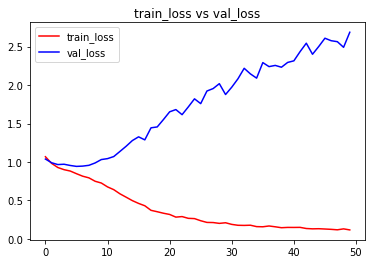

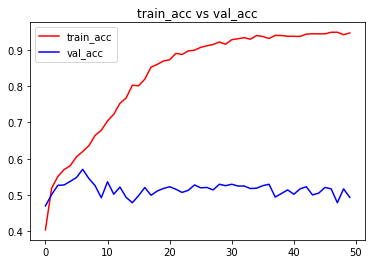

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
print("maks train acc: ", train_acc[-1])
val_acc=hist.history['val_accuracy']
print("maks validation acc: ", val_acc[-1])
epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [23]:
#Model Save
!mkdir -p saved_model
model.save('saved_model/my_model')
best_model.save_weights('model_weights2.h5')
best_model.save('model_keras2.h5')

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: saved_model/my_model\assets


## Hasil uji coba data test

In [24]:
from sklearn.metrics import confusion_matrix
results = best_model.predict_classes(X_val)
cm = confusion_matrix(np.where(y_val == 1)[1], results)
#cm = cm.astype(np.float) / cm.sum(axis=1)[:, np.newaxis]

D:\Anaconda\envs\tf2.4\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
import seaborn as sns
import pandas as pd

In [26]:
label_mapdisgust = ['good', 'poor','very_poor']

In [27]:
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )

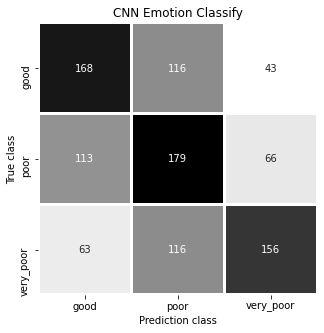

In [28]:
plt.figure(figsize = (5,5))
sns.heatmap(cm_df, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()